<a href="https://colab.research.google.com/github/yasseen116/AP-project/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

,amazon_order_id,purchase_day,order_status,amount,net_revenue,city
0,404-6232400-3205164,2025-05-30,Shipped,120.0,100.0,Nasr City
1,402-5852311-4717909,2025-05-30,Shipped,140.0,120.0,Suez
2,406-4813401-4215530,2025-05-30,Shipped,120.0,100.0,مدينة السادس من أكتوبر
4,406-1848261-7707503,2025-05-31,Shipped,240.0,220.0,Imbaba
5,407-8941664-1123545,2025-06-01,Shipped,120.0,100.0,El Shorouk City
6,405-1692448-7360311,2025-06-02,Shipped,120.0,100.0,6th of October City
7,404-3431184-2380333,2025-06-03,Shipped,170.0,150.0,القاهرة الجديدة
8,404-5674486-9989931,2025-06-03,Shipped,130.0,110.0,فيصل
9,402-1008314-1414760,2025-06-03,Shipped,120.0,100.0,ميت غمر
10,406-6583887-3670746,2025-06-04,Shipped,148.0,128.0,الدخيلة


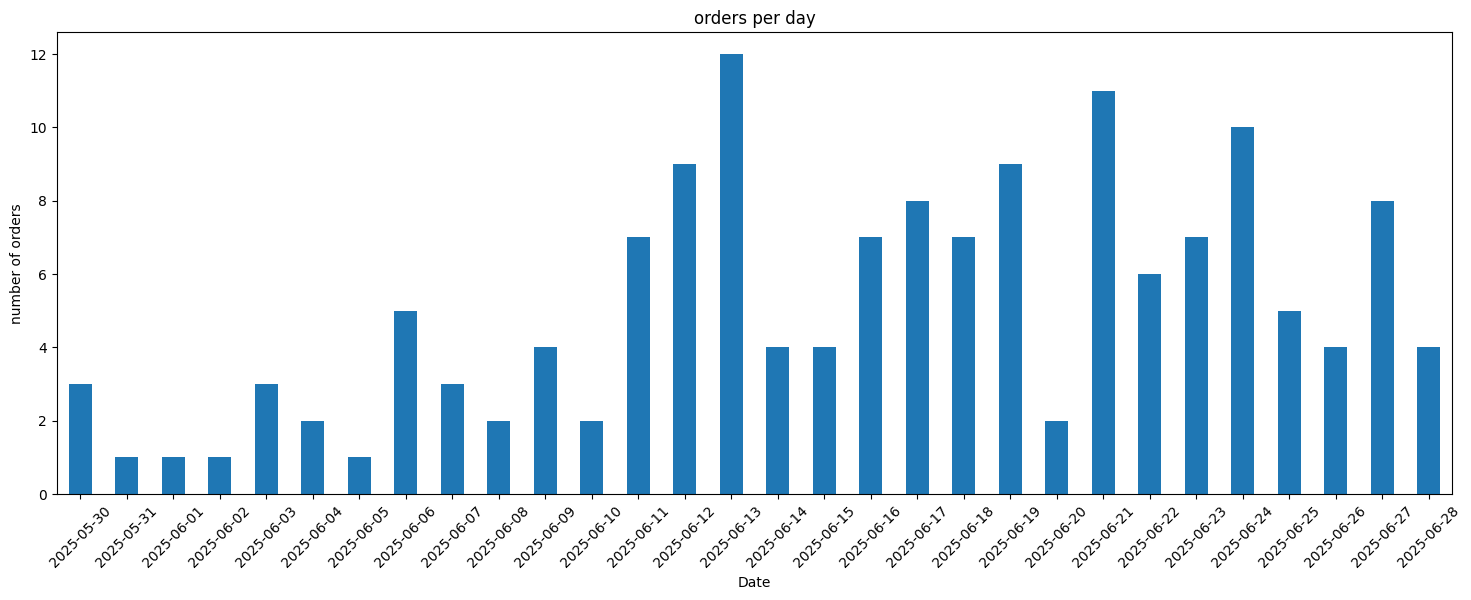

In [44]:
import numpy as np
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
class Order:
    def __init__(self, row):
        # Buyer Information
        self.BuyerEmail = row.get('BuyerInfo', {}).get('BuyerEmail', '')

        # Order Identifiers
        self.AmazonOrderId = row.get('AmazonOrderId', '')
        self.SellerOrderId = row.get('SellerOrderId', '')
        self.MarketplaceId = row.get('MarketplaceId', '')

        # Dates
        self.PurchaseDate = row.get('PurchaseDate', '')
        self.LastUpdateDate = row.get('LastUpdateDate', '')
        self.EarliestShipDate = row.get('EarliestShipDate', '')
        self.LatestShipDate = row.get('LatestShipDate', '')

        # Order Status and Type
        self.OrderStatus = row.get('OrderStatus', '')
        self.OrderType = row.get('OrderType', '')
        self.FulfillmentChannel = row.get('FulfillmentChannel', '')

        # Sales Information
        self.SalesChannel = row.get('SalesChannel', '')
        self.ShipServiceLevel = row.get('ShipServiceLevel', '')
        self.ShipmentServiceLevelCategory = row.get('ShipmentServiceLevelCategory', '')

        # Item Counts
        self.NumberOfItemsShipped = row.get('NumberOfItemsShipped', 0)
        self.NumberOfItemsUnshipped = row.get('NumberOfItemsUnshipped', 0)

        # Boolean Flags
        self.IsPremiumOrder = row.get('IsPremiumOrder', False)
        self.IsPrime = row.get('IsPrime', False)
        self.HasRegulatedItems = row.get('HasRegulatedItems', False)
        self.IsReplacementOrder = row.get('IsReplacementOrder', 'false')
        self.IsSoldByAB = row.get('IsSoldByAB', False)
        self.IsISPU = row.get('IsISPU', False)
        self.IsAccessPointOrder = row.get('IsAccessPointOrder', False)
        self.IsBusinessOrder = row.get('IsBusinessOrder', False)
        self.IsGlobalExpressEnabled = row.get('IsGlobalExpressEnabled', False)

        # Shipping Address
        shipping_address = row.get('ShippingAddress', {})
        self.StateOrRegion = shipping_address.get('StateOrRegion', '')
        self.City = shipping_address.get('City', '')
        self.CountryCode = shipping_address.get('CountryCode', '')
        self.County = shipping_address.get('County', '')

        # Order Total
        order_total = row.get('OrderTotal', {})
        self.CurrencyCode = order_total.get('CurrencyCode', '')
        self.Amount = order_total.get('Amount', '')

        # Payment Information
        self.PaymentMethod = row.get('PaymentMethod', '')
        self.PaymentMethodDetails = row.get('PaymentMethodDetails', [])

    def __repr__(self):
        return f"Order(AmazonOrderId='{self.AmazonOrderId}', Status='{self.OrderStatus}', Amount='{self.Amount} {self.CurrencyCode}')"

    def to_dict(self):
        """Convert order object to dictionary for database insertion"""
        return {
            'buyer_email': self.BuyerEmail,
            'amazon_order_id': self.AmazonOrderId,
            'seller_order_id': self.SellerOrderId,
            'marketplace_id': self.MarketplaceId,
            'purchase_date': self.PurchaseDate,
            'last_update_date': self.LastUpdateDate,
            'earliest_ship_date': self.EarliestShipDate,
            'latest_ship_date': self.LatestShipDate,
            'order_status': self.OrderStatus,
            'order_type': self.OrderType,
            'fulfillment_channel': self.FulfillmentChannel,
            'sales_channel': self.SalesChannel,
            'ship_service_level': self.ShipServiceLevel,
            'shipment_service_level_category': self.ShipmentServiceLevelCategory,
            'number_of_items_shipped': self.NumberOfItemsShipped,
            'number_of_items_unshipped': self.NumberOfItemsUnshipped,
            'is_premium_order': self.IsPremiumOrder,
            'is_prime': self.IsPrime,
            'has_regulated_items': self.HasRegulatedItems,
            'is_replacement_order': self.IsReplacementOrder,
            'is_sold_by_ab': self.IsSoldByAB,
            'is_ispu': self.IsISPU,
            'is_access_point_order': self.IsAccessPointOrder,
            'is_business_order': self.IsBusinessOrder,
            'is_global_express_enabled': self.IsGlobalExpressEnabled,
            'state_or_region': self.StateOrRegion,
            'city': self.City,
            'country_code': self.CountryCode,
            'county': self.County,
            'currency_code': self.CurrencyCode,
            'amount': self.Amount,
            'payment_method': self.PaymentMethod,
            'payment_method_details': ','.join(self.PaymentMethodDetails) if self.PaymentMethodDetails else ''
        }

#load dataset
with open('orders.json', 'r', encoding='utf-8') as f:
    raw_data = json.load(f)

#bulid list of Order objects
orders = [Order(o) for o in raw_data]

#flatten into list of dicts
flattened_data = [o.to_dict() for o in orders]

#convert to dataframe
df_orders = pd.DataFrame(flattened_data)


############################ cleaning #################################




#converting dates
df_orders['purchase_date'] = pd.to_datetime(df_orders['purchase_date'], errors='coerce')

#insuring numeric values
df_orders['amount'] = pd.to_numeric(df_orders['amount'],errors='coerce').fillna(0)
df_orders['number_of_items_shipped'] = pd.to_numeric(df_orders['number_of_items_shipped'],errors='coerce').fillna(0)

#dropping orders with no order id
df_orders.dropna(subset=['amazon_order_id'])

#dropping duplicates
df_orders.drop_duplicates(subset=['amazon_order_id'])

#creating pure date column
df_orders['purchase_day']= df_orders['purchase_date'].dt.date

#adding shipping cost
df_orders['shipping_cost'] = 20

#keeping only effective collumns
keep_col = ['amazon_order_id','purchase_day',"order_status","amount"]

#removing canceled orders

df_orders = df_orders[df_orders['order_status'] != 'Canceled']

# --- defining only useful columns --- #
keep_col = ['amazon_order_id','purchase_day',"order_status","amount",'net_revenue','city']







####################### computing net revenue #######
df_orders['net_revenue'] = df_orders['amount'] - df_orders['shipping_cost']
## keeping usefull collumns #
df_orders=df_orders[keep_col]



###################### plots ###############################

##### grouping by day ####
orders_per_day = df_orders.groupby('purchase_day')['amazon_order_id'].count()

## creation plot
plt.figure(figsize=(18,6))

orders_per_day.plot(kind='bar')
plt.title("orders per day")
plt.xlabel("Date")
plt.ylabel("number of orders")
plt.xticks(rotation=45)



#####displaying clean df and plot #########
df_orders.head(10)
